In [1]:
import pandas
import pandahouse as ph
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [4]:
# Сделаем графики в seaborn покрупнее
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20230120',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [6]:
# 1 - контрольная группа
# 2 - тестовая группа

query = '''
SELECT exp_group, user_id,
    sum(action = 'like') as likes, 
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions
WHERE toDate(time) >= '2023-01-01' 
    AND toDate(time) <= '2023-01-07'
    AND exp_group in (0, 1, 2, 3)
GROUP BY exp_group, user_id
'''

df = ph.read_clickhouse(query, connection=connection)
df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,9,30,0.300000
1,1,18392,7,32,0.218750
2,3,123580,13,48,0.270833
3,2,131473,14,134,0.104478
4,2,32420,26,128,0.203125


In [7]:
group0 = df[df.exp_group == 0]
group1 = df[df.exp_group == 1]
group2 = df[df.exp_group == 2]
group3 = df[df.exp_group == 3]

## Группы 0 и 3

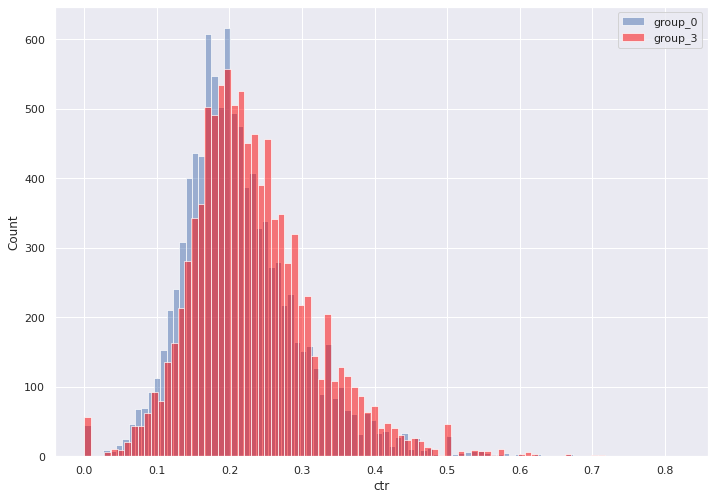

In [13]:
sns.histplot(group0.ctr, alpha=0.5, label='group_0')
sns.histplot(group3.ctr, color='red', alpha=0.5,label='group_3')
plt.legend()
plt.show()

In [9]:
stats.ttest_ind(group0.ctr,
                group3.ctr,
                equal_var=False)

Ttest_indResult(statistic=-13.896870721904069, pvalue=1.055849414662529e-43)

In [11]:
ctr_control = group0.likes.sum() / group0.views.sum()
lin0 = (group0.likes - ctr_control * group0.views).to_numpy()
lin3 = (group3.likes - ctr_control * group3.views).to_numpy()

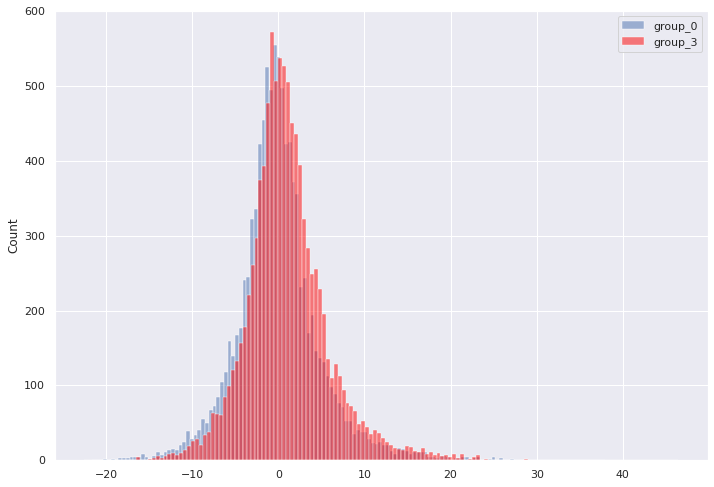

In [14]:
sns.histplot(lin0, alpha=0.5, label='group_0')
sns.histplot(lin3, color='red', alpha=0.5,label='group_3')
plt.legend()
plt.show()

In [41]:
stats.ttest_ind(lin1,
                lin2,
                equal_var=False)

Ttest_indResult(statistic=6.413520265034731, pvalue=4.892697783839065e-09)

После линеаризации значение p_value t-теста возрасло

## Группы 1 и 2

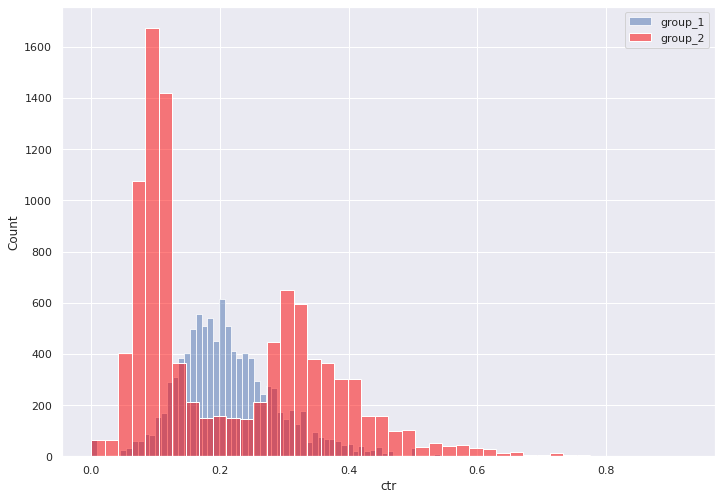

In [15]:
sns.histplot(group1.ctr, alpha=0.5, label='group_1')
sns.histplot(group2.ctr, color='red', alpha=0.5,label='group_2')
plt.legend()
plt.show()

In [16]:
stats.ttest_ind(group1.ctr,
                group2.ctr,
                equal_var=False)

Ttest_indResult(statistic=0.7094392041270485, pvalue=0.4780623130874935)

In [21]:
ctr_control = group1.likes.sum() / group1.views.sum()
lin1 = (group1.likes - ctr_control * group1.views).to_numpy()
lin2 = (group2.likes - ctr_control * group2.views).to_numpy()

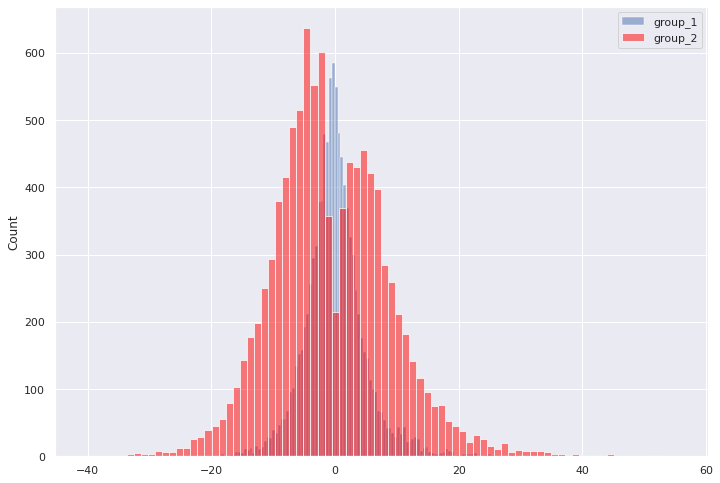

In [22]:
sns.histplot(lin1, alpha=0.5, label='group_1')
sns.histplot(lin2, color='red', alpha=0.5,label='group_2')
plt.legend()
plt.show()

In [26]:
stats.ttest_ind(lin1,
                lin2,
                equal_var=False)

Ttest_indResult(statistic=6.122579994775973, pvalue=9.439432187037712e-10)

In [25]:
stats.mannwhitneyu(lin1, 
                   lin2, 
                   alternative = 'two-sided')

MannwhitneyuResult(statistic=54534537.0, pvalue=9.404319579641738e-27)

Значение p-value для t-теста возрасло при линиаризации \
Если сравнивать значение p-value теста Манна-Уитни на расрпеделениях поюзерных ctr, то p-value возрасло.

В итоге, можно сказать, что линеаризация повысила чувствительность метрики